### Nama Kelompok : Data - 200

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

## 1. Descriptive Statistics

In [2]:
df = pd.read_csv('../dataset/train.csv')
df.shape

(381109, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
cat = ["Gender","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel"]
num = ["Age","Annual_Premium","Vintage"]

In [5]:
df[num].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [6]:
df_cat = df[cat].copy()
df_cat['Driving_License'] = df_cat['Driving_License'].astype(str)
df_cat['Region_Code'] = df_cat['Region_Code'].astype(str)
df_cat['Previously_Insured'] = df_cat['Previously_Insured'].astype(str)
df_cat['Policy_Sales_Channel'] = df_cat['Policy_Sales_Channel'].astype(str)
df_cat.describe()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,381109,381109,381109,381109,381109,381109,381109
unique,2,2,53,2,3,2,155
top,Male,1,28.0,0,1-2 Year,Yes,152.0
freq,206089,380297,106415,206481,200316,192413,134784


A. Semua tipe kolom pada dataset sudah sesuai

B. Tidak ada kolom yang memiliki nilai kosong

C. Berikut merupakan beberapa penjelasan summary dari masing-masing kolom
- Pada kolom Age dan Vintage nilai mean dan median tidak memiliki gap yang signifikan, menunjukkan bahwa distribusi cenderung normal
- Pada kolom Annual_Premium nilai mean dan median memiliki gap yang signifikan, menunjukkan adanya outlier atau skewed distribution
- Pada kolom driving license nilai "1" yang sangat dominan dibandingkan nilai "0"

## 2. Univariate Analysis

### Boxplot

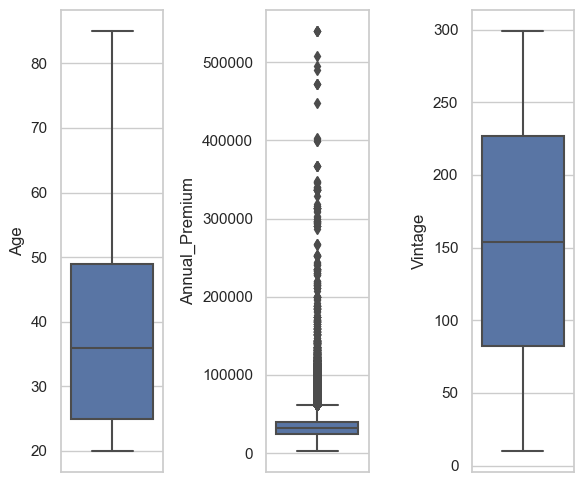

In [7]:
plt.figure(figsize=(6, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], orient='v')
    plt.tight_layout()

### Violinplot

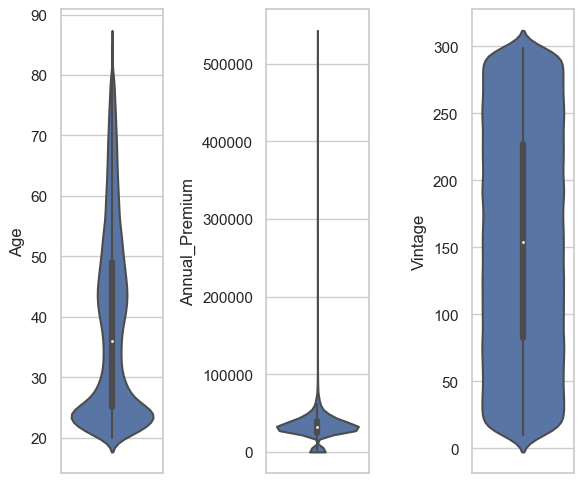

In [8]:
plt.figure(figsize=(6, 5))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], orient='v')
    plt.tight_layout()

### Histogram Plot

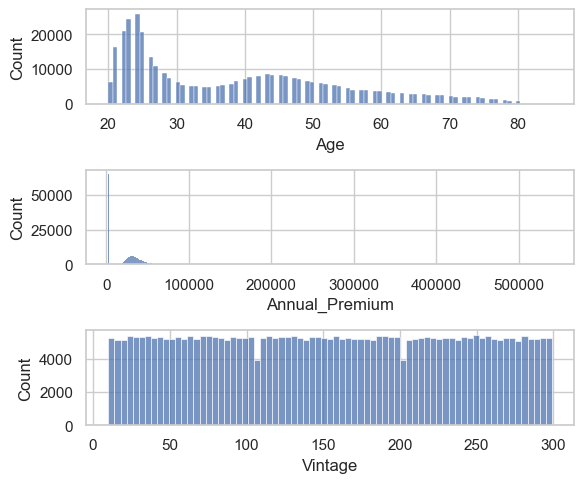

In [9]:
plt.figure(figsize=(6, 5))
for i in range(0, len(num)):
    plt.subplot(3, 1, i+1)
    sns.histplot(x=df[num[i]])
    plt.xlabel(num[i])
    plt.tight_layout()

### Countplot

In [10]:
cat_1 = ["Gender","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage"]
cat_2 = ["Region_Code","Policy_Sales_Channel"]

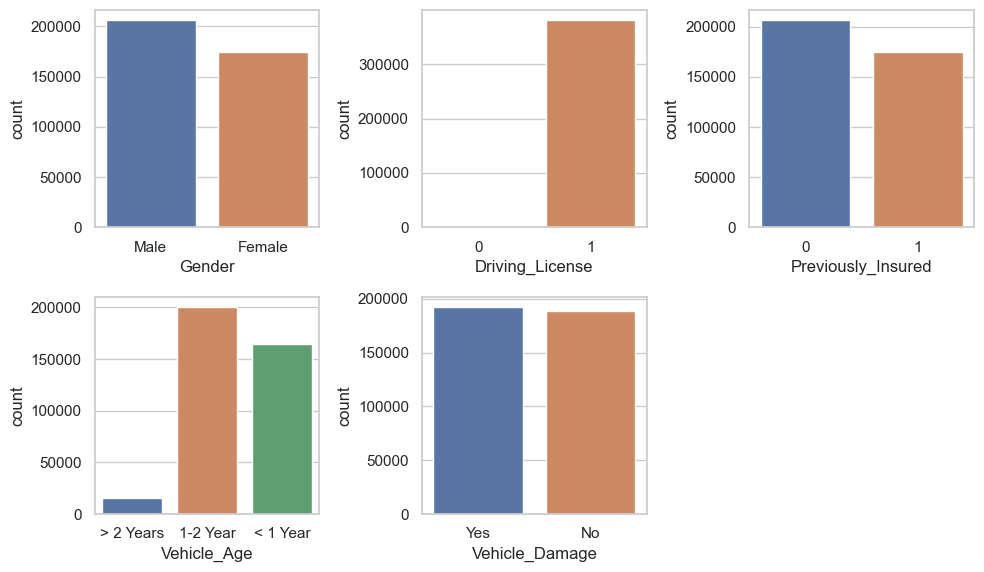

In [11]:
plt.figure(figsize=(10, 14))
for i in range(0, len(cat_1)):
    plt.subplot(len(cat_1), 3, i+1)
    sns.countplot(x=df[cat_1[i]], orient='v')
    plt.tight_layout()

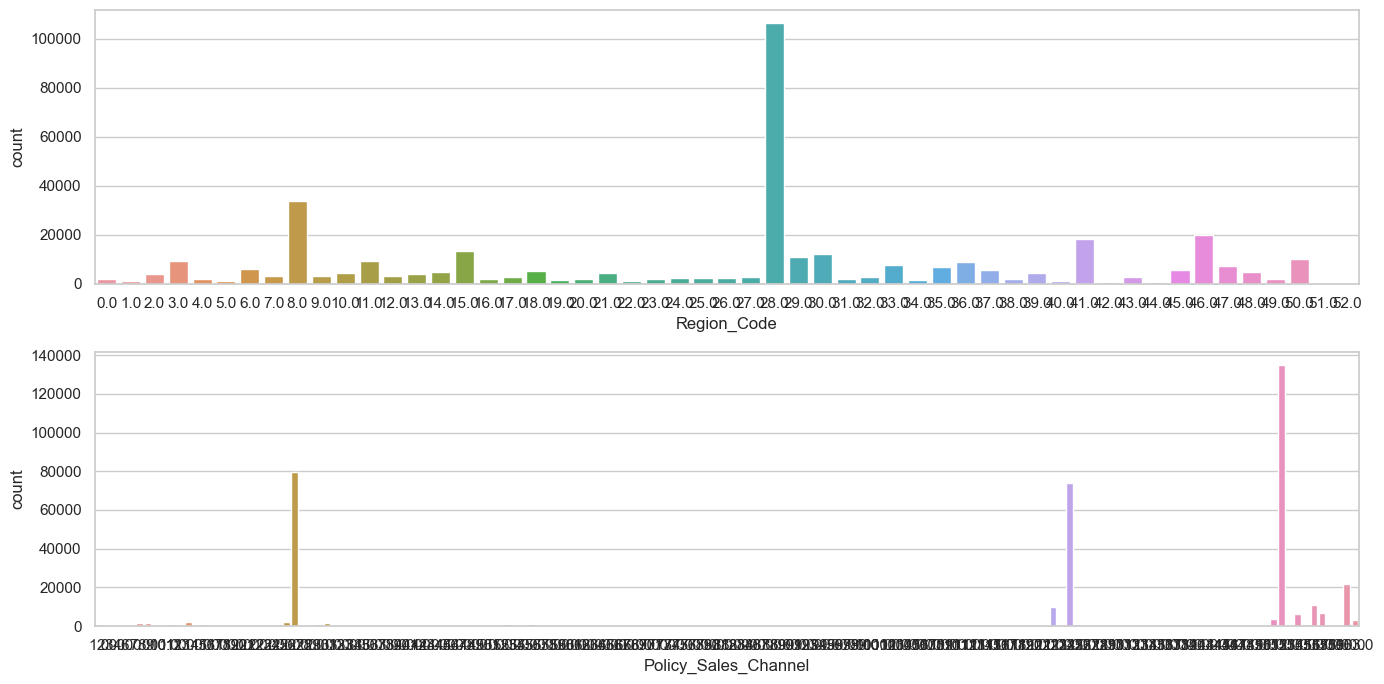

In [12]:
plt.figure(figsize=(14, 7))
for i in range(0, len(cat_2)):
    plt.subplot(len(cat_2), 1, i+1)
    sns.countplot(x=df[cat_2[i]], orient='v')
    plt.tight_layout()

### Penjelasan Distribusi

1. Age

    Age adalah usia pelanggan dalam tahun. Nilai minimum dan maksimum tampak masuk akal (20 hingga 85 tahun). Persebaran paling dominan pada umur 20-30 tahun. Tidak ada outlier yang jelas dalam data ini. 

2. Annual Premium

    Annual Premiumm adalah Premi Tahunan yang dibayar oleh nasabah. Ada variasi yang cukup besar dalam data ini. Dari boxplot, kita dapat melihat bahwa ada beberapa nilai yang jauh dari kuartil atas, yang menunjukkan adanya outlier.

3. Vintage

    Vintage adalah banyak hari nasabah telah terasosiasi dengan perusahaan. Nilai minimum adalah 10 hari dan Nilai maksimum adalah 299 hari, yang berarti ada pelanggan yang baru bergabung dan ada yang telah hampir satu tahun. Dari histogram, kita dapat melihat bahwa distribusi 'Vintage' hampir seragam, yang berarti setiap durasi asosiasi memiliki jumlah pelanggan yang hampir sama. Tidak ada durasi asosiasi tertentu yang jauh lebih umum daripada yang lain.

4. Driving License

    Driving License menunjukkan apakah pelanggan memiliki surat izin mengemudi atau tidak, dengan 1 berarti 'Ya' dan 0 berarti 'Tidak'. Sebagian besar pelanggan (380297 dari 381109) yaitu 99.79 memiliki surat izin mengemudi 

5. Region Code

    Region Code adalah Kode wilayah yang merupakan variabel kategorikal yang telah diencode sebagai numerik. Data paling banyak berada pada region code 28.

6. Previously Insured

    Previously Insured menunjukkan apakah pelanggan sudah memiliki asuransi kendaraan atau tidak. Dapat dilihat bahwa persebaran antara pelanggan yang telah memiliki dan belum mmemiliki asuransi kendaraan tidak jauh berbeda.

7. Policy Sales Channel
    
    Policy Sales Channel adalah Kode untuk suatu channel untuk menghubungi nasabah yang merupakan variabel kategorikal yang telah diencode sebagai numerik. Data paling banyak berada pada Policy Sales Channel 152.

8. Gender

    Gender merupakan jenis kelamin nasabah. Dapat dilihat pada countplot persebaran gender nasabah sudah cukup seimbang.

9. Vehicle Age

    Vehicle age merupakan umur kendaraan nasabah. Dapat dilihat bahwa kendaraan yang berumur di atas 2 tahun sangat sedikit jika dibangingkan dengan kendaraan yang berumur 1 tahun atau 1-2 tahun

10. Vehicle Damage

    Vehiclle damage menunjukkan apakah kendaraan suatu nasabah pernah kecelakaan di masa lalu. Dapat dilihat pada countplot persebaran vehicle damage sudah cukup seimbang.

11. Response

    Response adalah target label yang menunjukan apakah suatu nasabah tertarik atau tidak untuk membeli asuransi kendaraan. Persebaran response di dominasi oleh nilai 0 dan sangat sedikit nilai 1 pada data


### Preprocessing Follow-Up

1. Age

    Kita bisa mempertimbangkan untuk melakukan binning atau pengelompokan usia ke dalam beberapa kategori (misalnya: 'Muda', 'Dewasa', 'Lansia') untuk memudahkan interpretasi.

2. Annual Premium

    Kita mungkin perlu melakukan transformasi, seperti log transform, untuk mengurangi skewness. Selanjutnya penghapusan outlier menggunakan IQR juga bisa dilakukan.

3. Vintage

    Kita bisa mengubah 'Vintage' menjadi fitur kategorikal dengan membaginya ke dalam beberapa 'bin' atau kategori. Misalnya, kita bisa membuat kategori 'kurang dari 50 hari', '50-100 hari', '100-150 hari', dan seterusnya. 

4. Driving License

    Mengingat sebagian besar pelanggan memiliki surat izin mengemudi, fitur ini mungkin tidak memberikan banyak informasi untuk memprediksi respons sehingga mungkin bisa dihapus.

5. Region Code

    kita bisa mempertimbangkan untuk mengelompokkan wilayah berdasarkan frekuensi. Misalnya, kita bisa memiliki kategori 'wilayah berfrekuensi tinggi', 'wilayah berfrekuensi sedang', dan 'wilayah berfrekuensi rendah'.

6. Policy Sales Channel

    kita bisa mempertimbangkan untuk mengelompokkan channel berdasarkan frekuensi. Misalnya, kita bisa memiliki kategori 'channel berfrekuensi tinggi', 'channel berfrekuensi sedang', dan 'channel berfrekuensi rendah'.

7. Response

    Perlu dilakukan over sampling untuk mengatasi class imbalance pada response.

## 3. Multivariate Analysis

In [13]:
nums = ['Age','Annual_Premium','Vintage','Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel','Response',]

<Axes: >

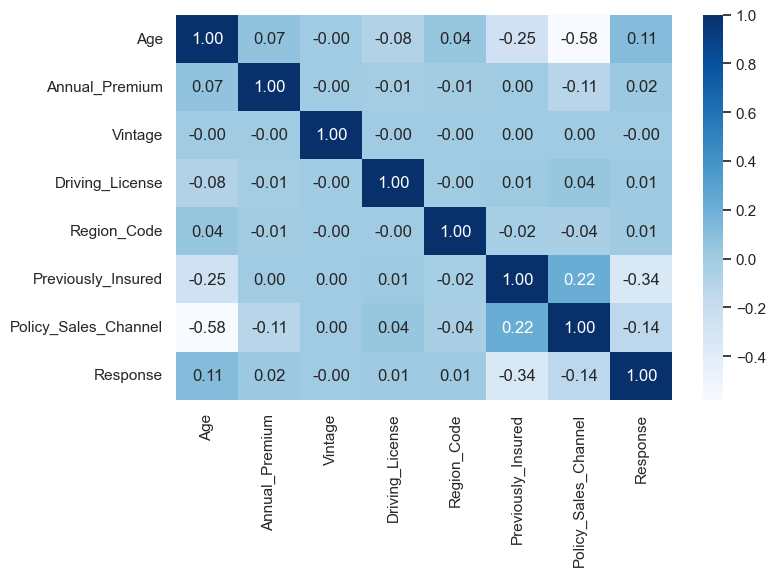

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

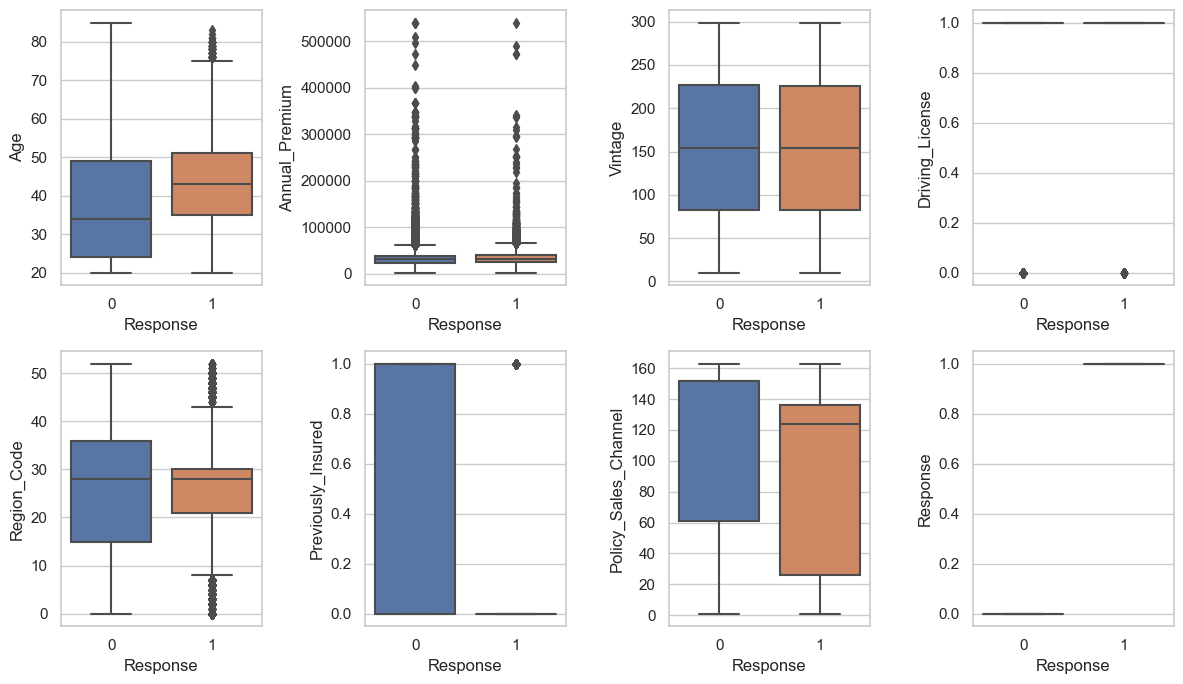

In [15]:
plt.figure(figsize=(12, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[nums[i]], x=df['Response'], orient='v')
    plt.tight_layout()

1. Heat Maps (membandingkan antar kolom numbers)

   Berdasarkan distribusi dari Heat maps tersebut yaitu membandingkan antar kolom numbers, belum ada korelasi yang kuat
   antara Response dengan kolom lain nya, sehingga sulit mengambil insight dari diagram ini.
   

2. Box plot (membandingkan feature number dengan target/Response)

    - Age dan Response
      Pada boxplot diatas nilai response 0 dan 1 berdasarkan usia, Response 0 memiliki persebaran di rentang usia 23 - 49 tahun, sedangkan Response 1 memiliki persebaran di rentang 35 -52 tahun, dan pada kedua response tersebut ada beberapa usia yang berada pada garis outlier, sehingga dapat disimpulkan respone 1 berdasarkan usia memiliki rata-rata umur 35-52 tahun (dewasa -lansia)
    
    - Annual_Premium dan Response
      Pada boxplot diatas Respone 0 dan 1 berdasarkan Annual_Premium memiliki nilai yang cukup seimbang yaitu di memiliki Annual_Premium di bawah 100000 dan bebrapa outlier pada kedua Response tersebut.

    - Vintage dan Response
      Pada Boxplot diatas Response 0 dan 1 Berdasarkan Vintage, lamanya nasabah yang terasosiasi dengan perusahaan memiliki jangka waktu yang seimbang yaitu berada pada rentang nilai 80 - 230 hari

    - Driving License dan Response
      Pada Boxplot diatas, tidak banyak informasi yang di dapat, antara Driving license dan Response tidak terlihat jelas persebaran nya .
    
    - Region Code dan Response
      Pada Boxplot diatas, response 1 berdasarkan Region Code berada pada rentang code 21 - 30 dan 50% ada pada rentang code 21-28 serta ada beberapa nilai outlier.
    
    - Previously_Insured dan Response
      Pada Boxplot diatas , Response 0 berdasarkan Previously_Insured itu mendominasi dibanding dengan response 1, hal tersebut menandakan bahwa yang response 1 atau pelanggan yang tertarik sebelumnya tidak memiliki asuransi kendaraan sebelumnya.

    - Policy_Sales_Channel dan Response
      Pada Boxplot diatas, Response 1 berdasarkan Policy_Sales_Channel memiliki persebaran code yang cukup beragam yaitu code 25-135, tetapi 50% pada Response 1 tersebut memiliki rentang code 25-125.
    
    

    

## 4. Business Insight